# Daten beschaffen und statistisch beschreiben

## 1. Datensatz finden

1. Finde einen für interessanten Datensatz.

Sammlungen von Datensätzen:

https://github.com/awesomedata/awesome-public-datasets  
https://www.kaggle.com/datasets    
https://archive.ics.uci.edu/datasets  
https://data.gov/  
https://datasetsearch.research.google.com/  
https://www.kdnuggets.com/datasets/index.html  

2. Importiere den Datensatz als ein Pandas Dataframe.
3. Zeige einen Ausschnitt der Daten in Form einer Tabelle.

In [2]:
import pandas as pd

# Direkt von der URL den Datensatz laden
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"

# Lade den Datensatz in ein Pandas DataFrame
df = pd.read_csv(url)

In [7]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


## 2. Ermittle Charakteristika des Datensatzes
1. In wie fern handelt es sich bei dem Datensatz um eine Stichprobe?
2. Finde Beispielvariablen in dem Datensatz, welche 
kontinuierlich, diskret, nominal und ordinal sind (wenn verfügbar).

**zu 1.)**
- Ja, der Palmer Penguins-Datensatz ist eine Stichprobe, da er nur eine begrenzte Anzahl von Pinguinen in bestimmten Gebieten (insbesondere in Palmer Station, Antarktis) repräsentiert und nicht die gesamte Population aller Pinguine weltweit.

- Stichprobe: Der Datensatz umfasst nur eine Auswahl von Pinguinen und liefert damit Informationen über diese spezifische Gruppe. Um Aussagen über die gesamte Pinguinpopulation zu machen, müsste man eine größere Anzahl von Pinguinen aus verschiedenen Regionen und verschiedenen Zeitpunkten betrachten.

**zu 2.)**
- **Kontinuierlich**: Zahlen mit unendlich vielen möglichen Werten (z. B. Gewicht, Länge).
- **Diskret**: Zählbare Zahlen mit nur bestimmten möglichen Werten (z. B. Anzahl der Kinder).
- **Nominal**: Kategorien ohne Reihenfolge (z. B. Haarfarbe, Geschlecht).
- **Ordinal**: Kategorien mit einer natürlichen Reihenfolge (z. B. Schulnoten, Bewertungen).

#### kontinuierliche Variablen
- `bill_length_mm` ((Länge des Schnabels in Millimetern),

    `bill_depth_mm` (Tiefe des Schnabels in Millimetern),

  `flipper_length_mm` (Länge des Flippers in Millimetern),

  `body_mass_g` (Körpermasse in Gramm)

#### diskrete Variablen
- `year`

#### nominale Varibalen
- `species`, `island`, `sex`

#### ordial: 
- keine klaren ordinalen Variablen



## 3. Berechne Lage- und Streuungsmaße für eine Variable
1. Lagemaße: Median, Modus, Arithmetisches Mittel, unteres und oberes Quartil.
2. Streuungsmaße: Spannweite, IQR, Varianz, Standardabweichung, Schiefe, Wölbung.

**Variable `bill_length_mm`**

**1. Lagemaße:**

- Median: Der Mittelwert der Werte, wenn sie der Größe nach geordnet sind.
- Modus: Der häufigste Wert im Datensatz.
- Arithmetisches Mittel (Durchschnitt): Summe der Werte geteilt durch die Anzahl der Werte.
- Unteres und oberes Quartil (Q1 und Q3): Die Werte, die die unteren 25% und die oberen 75% der Daten trennen.

In [12]:
median = df['bill_length_mm'].median()
mode = df['bill_length_mm'].mode()[0]  # Der Modus gibt eine Serie zurück, daher [0] um den ersten Wert zu bekommen
mean = df['bill_length_mm'].mean() 

# Quartile
Q1 = df['bill_length_mm'].quantile(0.25)
Q3 = df['bill_length_mm'].quantile(0.75)

print("Lagemaße:")
print(f"Median: {median}")
print(f"Modus: {mode}")
print(f"Arithmetisches Mittel: {mean}")
print(f"Untere Quartil (Q1): {Q1}")
print(f"Obere Quartil (Q3): {Q3}")

Lagemaße:
Median: 44.45
Modus: 41.1
Arithmetisches Mittel: 43.9219298245614
Untere Quartil (Q1): 39.225
Obere Quartil (Q3): 48.5


**2.) Streuungsmaße**
- Spannweite (Range): Differenz zwischen dem maximalen und dem minimalen Wert.
- Interquartilsabstand (IQR): Unterschied zwischen dem oberen und unteren Quartil.
- Varianz: Maß für die Streuung der Werte.
- Standardabweichung: Die Quadratwurzel der Varianz, ebenfalls ein Maß für die Streuung.
- Schiefe (Skewness): Gibt an, ob die Verteilung schief ist.
- Wölbung (Kurtosis): Gibt die "Spitzigkeit" oder Flachheit der Verteilung an.

In [15]:
# Berechnungen der Streuungsmaße
range_val = df['bill_length_mm'].max() - df['bill_length_mm'].min()
IQR = Q3 - Q1
variance = df['bill_length_mm'].var()
std_dev = df['bill_length_mm'].std()
skewness = df['bill_length_mm'].skew()
kurtosis = df['bill_length_mm'].kurt()

print("\nStreuungsmaße:")
print(f"Spannweite: {range_val}")
print(f"Interquartilsabstand (IQR): {IQR}")
print(f"Varianz: {variance}")
print(f"Standardabweichung: {std_dev}")
print(f"Schiefe: {skewness}")
print(f"Wölbung: {kurtosis}")


Streuungsmaße:
Spannweite: 27.5
Interquartilsabstand (IQR): 9.274999999999999
Varianz: 29.807054329371816
Standardabweichung: 5.4595837139265315
Schiefe: 0.05311806699132413
Wölbung: -0.8760269663060134


**1. Spannweite: 27.5**
- Definition: Größter Wert minus kleinster Wert.
- Bedeutung: Die Daten variieren über eine Spanne von 27,5 Einheiten.
- Achtung: Sehr anfällig für Ausreißer – ein einziger Extremwert kann die Spannweite stark verzerren.

**2. Interquartilsabstand (IQR): 9.27**
- Definition: Q3 - Q1 → Streuung der mittleren 50 % der Daten.
- Bedeutung: Die mittleren 50 % deiner Daten liegen innerhalb eines Bereichs von 9,27 Einheiten.
- Vorteil: Robuster gegen Ausreißer als die Spannweite.

**3. Varianz: 29.81**
- Definition: Durchschnitt der quadrierten Abweichungen vom Mittelwert.
- Bedeutung: Ein Maß dafür, wie stark die Werte im Durchschnitt vom Mittelwert abweichen.
- Einheit: Quadrat der Originaleinheit (z. B. mm², wenn es um Schnabellänge in mm geht).

**4. Standardabweichung: 5.46**
- Definition: Quadratwurzel der Varianz.
- Bedeutung: Die Werte weichen im Schnitt um etwa 5,46 Einheiten vom Mittelwert ab.
- Einheit: Gleiche Einheit wie die Messwerte (z. B. mm).
- Interpretation: Typische Streuung der Werte um den Mittelwert – gut vergleichbar zwischen Variablen.

**5. Schiefe (Skewness): 0.053**
- Definition: Maß für die Asymmetrie der Verteilung.
- Interpretation:
- 0 = symmetrisch.

        > 0 = leichte Rechtsschiefe (langer „Schwanz“ rechts).

        < 0 = Linksschiefe.

- Dein Wert: 0.053 ist fast 0 → nahezu symmetrische Verteilung.

**6. Wölbung (Kurtosis): -0.876**
- Definition: Maß für die "Spitzigkeit" oder "Flachheit" der Verteilung.
- Interpretation:
   
        0 = normalverteilt.

        > 0 = „spitzere“ Verteilung (mehr Ausreißer, „heavy tails“).

        < 0 = flachere Verteilung als Normalverteilung („leichtbauchig“).

- Dein Wert: -0.876 → flacher als eine Normalverteilung, weniger extreme Ausreißer.

## 4. Histogramm darstellen
Zeige 2 Histogramme mit verschiedenen Klassengrößen für die Häufigkeitsverteilung einer Variable (z.B. 5 Klassen und 20 Klassen).

In [31]:
# !pip install matplotlib

In [18]:
import matplotlib.pyplot as plt

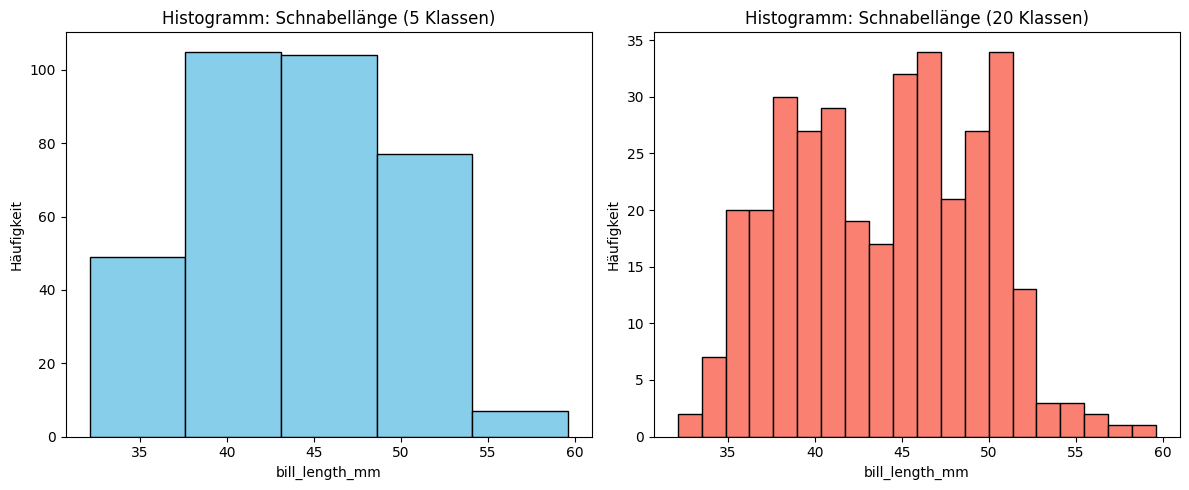

In [30]:
# Bsp. Schnabellänge, NaN-Werte entfernen
data = df["bill_length_mm"].dropna()

plt.figure(figsize=(12, 5))

# Histogramm mit 5 Klassen
plt.subplot(1, 2, 1)  # 1 Zeile, 2 Spalten, 1. Plot (der linke)
plt.hist(data, bins=5, color="skyblue", edgecolor="black")
plt.title("Histogramm: Schnabellänge (5 Klassen)")
plt.xlabel("bill_length_mm")
plt.ylabel("Häufigkeit")

# Histogramm mit 20 Klassen
plt.subplot(1, 2, 2) # 1 Zeile, 2 Spalten, 2. Plot (der rechte)
plt.hist(data, bins=20, color="salmon", edgecolor="black")
plt.title("Histogramm: Schnabellänge (20 Klassen)")
plt.xlabel("bill_length_mm")
plt.ylabel("Häufigkeit")

plt.tight_layout()
plt.show()


**bins=5** bedeutet: 
- Der Wertebereich (z.B. von 32 mm bis 60 mm Schnabellänge) wird in 5 gleich breite Intervalle (also Klassen) aufgeteilt.
- Dann zählt matplotlib, wie viele Werte in jede Klasse fallen (= Häufigkeit).

## 5. Zusammenhangsmaße
Wähle zwei Variablen aus, bei denen du einen Zusammenhang vermutest und berechne die Kovarianz und Pearson-Korrelation der beiden.

**Kovarianz** 
- misst, **ob zwei Variablen gemeinsam variieren**:
    - **positiv**: Wenn eine Variable steigt, steigt die andere tendenziell auch.
    - **negativ**: Wenn eine Variable steigt, sinkt die andere tendenziell.
- Problem: **Einheitenabhängig** – schwer vergleichbar, da die Skala keine Standardgröße hat.

**Pearson-Korrelation (r)**
- Misst den linearen Zusammenhang zwischen zwei Variablen.
    - Skala: von -1 bis +1
    - +1 → starker positiver linearer Zusammenhang
    - 0 → kein linearer Zusammenhang
    - -1 → starker negativer linearer Zusammenhang

#### Zusammenhang zwischen der Schnabellänge (`bill_length_mm`) und Schnabeltiefe (`bill_length_mm`)

In [38]:
# relevante Spalten und fehlende Werte entfernen
df_clean = df[["bill_length_mm", "body_mass_g"]].dropna()

# Kovarianz
cov = df_clean.cov()
print("Kovarianz:\n", cov)

Kovarianz:
                 bill_length_mm    body_mass_g
bill_length_mm       29.807054    2605.591912
body_mass_g        2605.591912  643131.077327


- Kovarianz zwischen `bill_length_mm` und `body_mass_g`: 2605.59
- zeigt **positive Kovarianz** zwischen der Schnabellänge und dem Gewicht
- positive Kovarianz: dass größere Werte einer Variable tendenziell mit größeren Werten der anderen Variable verbunden sind. &rarr; Je länger der Schnabel, desto größer das Gewicht (aber der Wert alleine sagt noch nichts darüber aus, wie stark der Zusammenhang ist).

Die absolute Größe der Kovarianz ist schwierig zu interpretieren, da sie von den Einheiten der Variablen abhängt (hier Millimeter für die Schnabellänge und Gramm für das Gewicht).

**&rarr; Wenn Einheiten der Variablen unterschiedlich, dann Einheiten standardisieren!!**

In [39]:
# Pearson-Korrelation
corr = df_clean.corr(method="pearson")
print("\nPearson-Korrelation:\n", corr)


Pearson-Korrelation:
                 bill_length_mm  body_mass_g
bill_length_mm         1.00000      0.59511
body_mass_g            0.59511      1.00000


**Pearson-Korrelation: 0.595**
- zeigt einen moderat positiven linearen Zusammenhang zwischen der Schnabellänge und dem Gewicht
- Werte nahe bei 1 (zwischen 0.5 und 1) zeigen, dass der Zusammenhang positiv und relativ stark ist. D.h., es gibt eine **mäßige Tendenz**, dass ein längerer Schnabel mit einem höheren Gewicht korreliert.

**&rarr; Kovarianz zeigt den positiven Zusammenhang, aber die Pearson-Korrelation quantifiziert den Zusammenhang mit einem Wert von 0.595, was als mäßig starker positiver Zusammenhang interpretiert werden kann.**

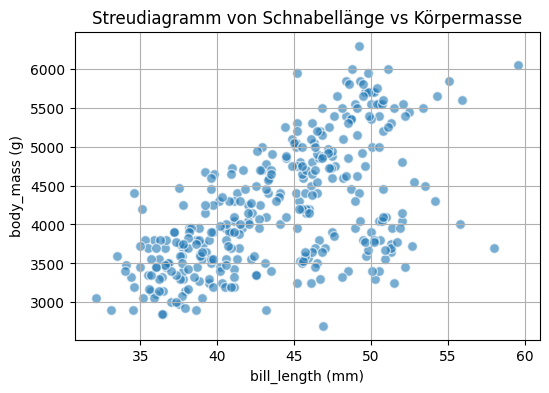

In [51]:
# Streudiagramm erstellen
plt.figure(figsize=(6, 4))
plt.scatter(df['bill_length_mm'], df['body_mass_g'], alpha=0.6, edgecolors="w", s=50)
plt.title('Streudiagramm von Schnabellänge vs Körpermasse', fontsize=12)
plt.xlabel('bill_length (mm)', fontsize=10)
plt.ylabel('body_mass (g)', fontsize=10)
plt.grid(True)
plt.show()

- `plt.scatter()`: Diese Funktion erstellt das Streudiagramm, indem sie die Werte der beiden Variablen auf den x- und y-Achsen plotten.
- `alpha=0.6`: Setzt die Transparenz der Punkte, um Überlagerungen besser sichtbar zu machen.
- `edgecolors="w"`: Fügt weiße Ränder um die Punkte hinzu, um sie deutlicher zu machen.
- `s=100`: Definiert die Größe der Punkte.
- `plt.title(), plt.xlabel(), plt.ylabel()`: fügen Titel und Achsenbeschriftungen hinzu.
- `plt.grid(True)`: Zeigt ein Gitter im Hintergrund des Diagramms an, um die Werte besser ablesen zu können.

## 6. Konfidenzintervall

Bereche die obere und untere Grenze des Konfidenzintervalls für den Mittelwert einer Variable unter Annahme einer Normalverteilung und einem Konfidenzniveau von 0,95.

Das **Konfidenzintervall** ist eine Art von Intervallschätzung, die
einen wahrscheinlichen Bereich angibt, in dem ein unbekannter
Parameter einer Population liegen könnte.

### Schritte zur Berechnung des Konfidenzintervalls
- Berechne den Mittelwert der Variable.
- Berechne die Standardabweichung der Variable.
- Berechne den Standardfehler des Mittelwerts
- Bestimme den t-Wert für das Konfidenzniveau von 0,95 und der entsprechenden Freiheitsgrade
- Berechne die obere und untere Grenze des Konfidenzintervalls.

In [57]:
#!pip install --upgrade pip

In [59]:
#!pip install numpy

In [61]:
#!pip install scipy

# Konfidenzintervall berechnen
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

https://statologie.de/konfidenzintervall-python/

- in der offiziellen Dokumentation von `scipy.stats.norm`: wie berechnet man ein Konfidenzintervall unter der Annahme einer Normalverteilung
- Die Funktion **`norm.interval()`** wird verwendet, um ein Konfidenzintervall mit gleich großen Bereichen um den Median zu bestimmen.

**`scipy.stats.norm.interval(confidence, loc=0, scale=1)`**

`confidence`: Das gewünschte Konfidenzniveau (z. B. 0.95 für ein 95%-Konfidenzintervall).

`loc`: Der Mittelwert der Verteilung.

`scale`: Die Standardabweichung der Verteilung.​

In [71]:
#!pip install --upgrade scipy

In [4]:
import pandas as pd

# Direkt von der URL den Datensatz laden
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"

# Lade den Datensatz in ein Pandas DataFrame
df = pd.read_csv(url)

In [3]:
import numpy as np
import scipy.stats as st

# Beispiel: Pinguin-Daten (bill_length_mm) aus deinem DataFrame
bill_length_mm = df['bill_length_mm'].dropna()  # Entfernt Null-Werte, falls vorhanden

# Berechne den Mittelwert und den Standardfehler
mean_bill_length = np.mean(bill_length_mm) 
sem_bill_length = st.sem(bill_length_mm) # Standardfehler des Mittelwerts

# Berechne das 95%-Konfidenzintervall (korrekte Reihenfolge der Argumente)
confidence_interval = st.norm.interval(0.95, loc=mean_bill_length, scale=sem_bill_length)

# Ausgabe des Konfidenzintervalls
print(f"95%-Konfidenzintervall für die Schnabellänge der Pinguine: {confidence_interval}")

95%-Konfidenzintervall für die Schnabellänge der Pinguine: (np.float64(43.343308323543695), np.float64(44.50055132557911))


**Erklärung:**

`st.norm.interval(0.95, ...)`: Dies berechnet das 95%-Konfidenzintervall. Der Wert 0.95 ist das Konfidenzniveau.

`loc=mean_bill_length`: Der Mittelwert der Schnabellängen der Pinguine.

`scale=sem_bill_length`: Der Standardfehler des Mittelwerts.

### ----- Ausführliche Varinate zur Berechnung des Konfidenzintervalls -----

In [62]:
import numpy as np
from scipy import stats

# für bill_length
data = df['bill_length_mm'].dropna()  

# 1. Mittelwert
mean = np.mean(data)

# 2. Standardabweichung
std_dev = np.std(data, ddof=1) # ddof=1 -> die Stichprobenstandardabweichung wird berechnet

# 3. Standardfehler
n = len(data)
se = std_dev / np.sqrt(n)

# 4. t-Wert für ein 95% Konfidenzintervall
confidence_level = 0.95
t_value = stats.t.ppf((1 + confidence_level) / 2, df=n-1)  # Freiheitsgrade = n-1

# 5. Konfidenzintervall berechnen
margin_of_error = t_value * se
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

# Ergebnis anzeigen
print(f"Mittelwert: {mean}")
print(f"Standardabweichung: {std_dev}")
print(f"Standardfehler: {se}")
print(f"t-Wert: {t_value}")
print(f"Konfidenzintervall: ({lower_bound}, {upper_bound})")


Mittelwert: 43.9219298245614
Standardabweichung: 5.4595837139265315
Standardfehler: 0.29522047628517617
t-Wert: 1.9669451293270581
Konfidenzintervall: (43.34124734665466, 44.502612302468144)


#### Interpretation:
- **Mittelwert** (43.92): Der Mittelwert gibt an, dass der durchschnittliche Wert der Schnabellänge der Pinguine in deinem Datensatz 43,92 mm beträgt.
- **Standardabweichung** (5.46): Die Standardabweichung misst, wie stark die einzelnen Werte von diesem Mittelwert abweichen. Eine Standardabweichung von 5,46 mm bedeutet, dass die Schnabellängen der Pinguine im Durchschnitt etwa 5,46 mm von 43,92 mm abweichen.
- **Standardfehler** (0.30): Der Standardfehler gibt an, wie genau der Mittelwert in Bezug auf die wahre durchschnittliche Schnabellänge der gesamten Population geschätzt wird. Ein Standardfehler von 0,30 bedeutet, dass wir den Mittelwert des Datensatzes mit einer gewissen Unsicherheit schätzen. Je kleiner der Standardfehler, desto genauer ist unsere Schätzung.
- **t-Wert** (1.97): Der t-Wert ist ein Wert aus der t-Verteilung, der für die Berechnung des Konfidenzintervalls verwendet wird. Dieser Wert hängt vom gewünschten Konfidenzniveau (hier 95%) und den Freiheitsgraden (n-1) ab. Der t-Wert von 1,97 ist typisch für ein 95%-Konfidenzniveau.
- **Konfidenzintervall** (43.34, 44.50): Das Konfidenzintervall gibt den Bereich an, in dem wir mit 95%iger Sicherheit den wahren Mittelwert der Schnabellängen der Pinguine in der gesamten Population erwarten. Das bedeutet:

        Wir sind zu 95% sicher, dass der wahre durchschnittliche Wert der Schnabellänge der Pinguine zwischen 43,34 mm und 44,50 mm liegt.

&rarr; Wenn ich dieses Experiment viele Male wiederholen würde (d.h. viele verschiedene Stichproben ziehe), würden 95% dieser Stichprobenmittelwerte in diesem Bereich liegen.

**Fazit:**

Das Konfidenzintervall zeigt, dass der wahre Mittelwert der Schnabellänge der Pinguine mit hoher Wahrscheinlichkeit zwischen 43,34 mm und 44,50 mm liegt. Das Intervall gibt uns eine Vorstellung von der Unsicherheit unserer Schätzung, aber es stellt sicher, dass wir mit 95%iger Sicherheit sagen können, dass der wahre Mittelwert irgendwo in diesem Bereich liegt.
